In [56]:
import pymongo 
db=pymongo.MongoClient()['crypto']
certs=db['certs']

In [64]:
count_rsa=certs.count_documents({'rsa_PEM':{"$exists":True}})
count_rsa

122030

In [68]:
from collections import Counter
bits_list=[ doc.get('bits',-1) for doc in 
           certs.find({'rsa_PEM':{"$exists":True}},{"bits":1})]
{k:(v,round(100*v/count_rsa,1)) for k,v in Counter(bits_list).items()}

{2048: (89875, 73.6),
 4096: (31661, 25.9),
 1024: (114, 0.1),
 3072: (377, 0.3),
 4086: (1, 0.0),
 8192: (1, 0.0),
 2560: (1, 0.0)}

In [70]:
keyHashes=certs.distinct('keyHash')
len(keyHashes)

116976

In [71]:
certs.estimated_document_count()-len(keyHashes)

17598

In [7]:
certs.find_one().keys()

dict_keys(['_id', 'url', 'cert_PEM', 'keyHash', 'bits', 'is_only_pub', 'key_type', 'key_PEM', 'rsa_PEM'])

In [15]:
%%time
susp=[]
for k in keyHashes:
    docs=list(certs.find({'keyHash':k}))
    if len(docs)>1:
        susp.append(docs)

CPU times: user 25.5 s, sys: 2.37 s, total: 27.8 s
Wall time: 41 s


In [24]:
from itertools import combinations

def is_duplicate_urls(lst):
    urls=[d['url'][8:].replace('www.','') for d in lst]
    return all([(f in s or s in f) for f,s in combinations(urls,2)])
    
dedup_url=[s for s in susp if not is_duplicate_urls(s)]

In [27]:
len(dedup_url)

2882

In [33]:
def is_duplicate_urls2(lst):
    urls=[set(d['url'][8:].replace('www.','').replace('.pl','').split('.')) for d in lst]
    return any([bool(f.intersection(s)) for f,s in combinations(urls,2)])

In [34]:
dedup_url2=[s for s in dedup_url if not is_duplicate_urls2(s)]

In [38]:
len(dedup_url2)

731

Text(0.5, 1.0, 'Hist of true duplicates - log')

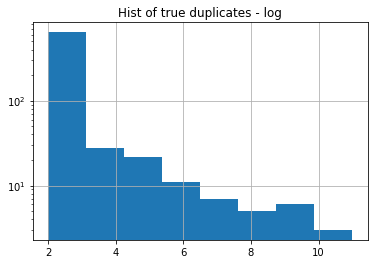

In [55]:
import pandas as pd
df=pd.Series(map(len,dedup_url2))
ax=df.hist(bins=8,range=(2,11),log=True)
ax.set_title('Hist of true duplicates - log')

In [42]:
print('\n\n'.join([' '.join([dd['url'][8:] for dd in d]) for d in dedup_url2 if len(d)>10]))

anielaolsztynek.pl ipresso.pl ranczokamienczyk.pl xpictures.pl applay.pl biorekredyt.pl brb.fundacjazendriving.pl fullstak.pl gsi-goszczynski.pl infobot.pl katowice.meetjs.pl ligagraczy.pl powtorkazpolskiego.pl sesja.dastudnia.pl www.smart.biz.pl tanieelewacje.pl times.edu.pl

devfest.wroclaw.pl fmpmsa.pl misja-kerygma.pl portuj.pl repsol-car.pl weedweek.pl chmurakrajowa.pl esportgamesclub.pl kartawfrp.pl kwzgoda.pl caninto.space osiedleczekanow.pl standardexpress.pl

akcesoria-dachowe.pl allekwiaty.pl galt.pl hardgirl.pl mok.opole.pl pix.mtlumaczenia.pl pysznica.pl grono.gda.pl osir.szczecinek.pl www.radosc.edu.pl www.sinprogres.pl

bitmarket.pl bymagdabereda.pl epidemiasportu.pl furnituro.pl testingspace.pl aptekazdrowie.pl epizza.szczecin.pl erospace.pl michalboni.pl online-vod.pl reg-me.pl strefamariza.pl studio-prestige.pl

chicestilo.pl kotwarszawski.pl kotwicapiekna.pl lifestyleterii.pl papieroweskarby.pl caipiroska.pl carpe--diem.pl chinguuiblog.pl ilta4crochet.pl piecpopiatej.